In [1]:
import numpy as np
import sRTp
import pickle

In [2]:
global_comms = pickle.load(open("test_0_output.pickle", "rb"))

In [3]:
len(global_comms)

12292

In [4]:
comms_by_len = {}
for comm_id, comm in global_comms.items():
    if comm.size not in comms_by_len:
        comms_by_len[comm.size] = []
    comms_by_len[comm.size].append(comm_id)

In [5]:
comms_by_len.keys()

dict_keys([4096, 1, 2])

In [6]:
len(comms_by_len[4096])

4

In [7]:
help(sRTp.globalComm)

Help on class globalComm in module sRTp.analysisTypes:

class globalComm(builtins.object)
 |  globalComm(commId: str, size: int)
 |
 |  A class representing a global NCCL communicator.
 |
 |  This class is a container for multiple local communicators and provides methods to manage operations across them.
 |
 |  Methods defined here:
 |
 |  __init__(self, commId: str, size: int)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  add_local_communicator(
 |      self,
 |      local_comm: sRTp.analysisTypes.localComm,
 |      global_rank: int
 |  )
 |      Add a local communicator to the global communicator.
 |
 |  check_consistency(self) -> bool
 |      Check if all local communicators have the same pending and completed operations, and that the completed operations have the same sequence numbers, counts, and dtypes.
 |
 |  comm_record_complete(self) -> bool
 |      Returns True if there is a local comm object for every rank in the communicator.
 |
 |      If th

In [8]:
for comm in comms_by_len[4096]:
    print(comm)
    print(f"Consistent: {global_comms[comm].check_consistency()}")
    print(f"{global_comms[comm].get_completed_opcounts()[0]} Completed Operations:")
    durations = global_comms[comm].get_completed_durations()
    #print(global_comms[comm].get_completed_operations())
    for iop, op in enumerate(global_comms[comm].get_completed_operations()):
        print(f"Operation {iop}: {op.op_type} count: {op.count} dtype: {op.dtype} Times: max {durations[:, iop].max()} ms min {durations[:, iop].min()} ms mean {durations[:, iop].mean()} ms")
    print("pending opcounts:")
    print(global_comms[comm].get_pending_opcounts()[0])


0xbc8a3ad231751b7
Consistent: True
12 Completed Operations:
Operation 0: AllGather count: 131072 dtype: 9 Times: max 695.6609999760985 ms min 296.6729999752715 ms mean 577.334997070885 ms
Operation 1: AllGather count: 131072 dtype: 9 Times: max 1281.594000000041 ms min 168.7789999996312 ms mean 871.4096513668608 ms
Operation 2: AllGather count: 131072 dtype: 9 Times: max 736.4919999963604 ms min 223.40399998938665 ms mean 546.7350217280612 ms
Operation 3: AllGather count: 131072 dtype: 9 Times: max 528.0599999823608 ms min 368.64599998807535 ms mean 376.79928955047615 ms
Operation 4: AllGather count: 131072 dtype: 9 Times: max 467.4210000084713 ms min 372.93499999213964 ms mean 418.3307597655457 ms
Operation 5: AllGather count: 131072 dtype: 9 Times: max 379.12900000810623 ms min 367.9509999928996 ms mean 377.03097387701945 ms
Operation 6: AllGather count: 131072 dtype: 9 Times: max 467.78400003677234 ms min 372.6170000154525 ms mean 418.2057807610988 ms
Operation 7: AllGather count: 1

In [9]:
print(global_comms['0xc0a6e4e99db3f284'].local_communicators[0].completed_operations)

[Operation(type=ReduceScatter, seq_num=0, status=completed, duration=600486.670000013 ms)]


In [10]:
global_comms['0xc0a6e4e99db3f284'].get_completed_durations()

array([[600486.67000001],
       [600485.27499998],
       [600486.00500001],
       ...,
       [600510.02300001],
       [600513.94999999],
       [600511.09300001]], shape=(4096, 1))

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
%matplotlib inline

In [12]:
def plot_op_times(comm, opstart=0, opend=None):
    completed_ops = comm.get_completed_durations()
    figure, ax = plt.subplots(figsize=(12, 6))
    for op in range(completed_ops.shape[1])[opstart:opend]:
        ax.plot(np.arange(completed_ops.shape[0]), completed_ops[:,op], label=f"op {op}, {comm.local_communicators[0].completed_operations[op].op_type}")
    ax.set_xlabel("rank")
    ax.set_ylabel("duration (ms)")
    ax.legend()

In [13]:
timeout_comm = global_comms['0xc0a6e4e99db3f284']

In [14]:
durations = timeout_comm.get_completed_durations()

In [15]:
durations.min()

np.float64(600136.8870000006)

In [16]:
timeout_comm.local_to_global_rank_map[durations.argmin()]

2732

In [17]:
for i in range(len(durations)):
    if durations[i] < 500000:
        print(f"Rank {i} has a duration of {durations[i]} ms")
        print(f"Global Rank {timeout_comm.local_to_global_rank_map[i]}")

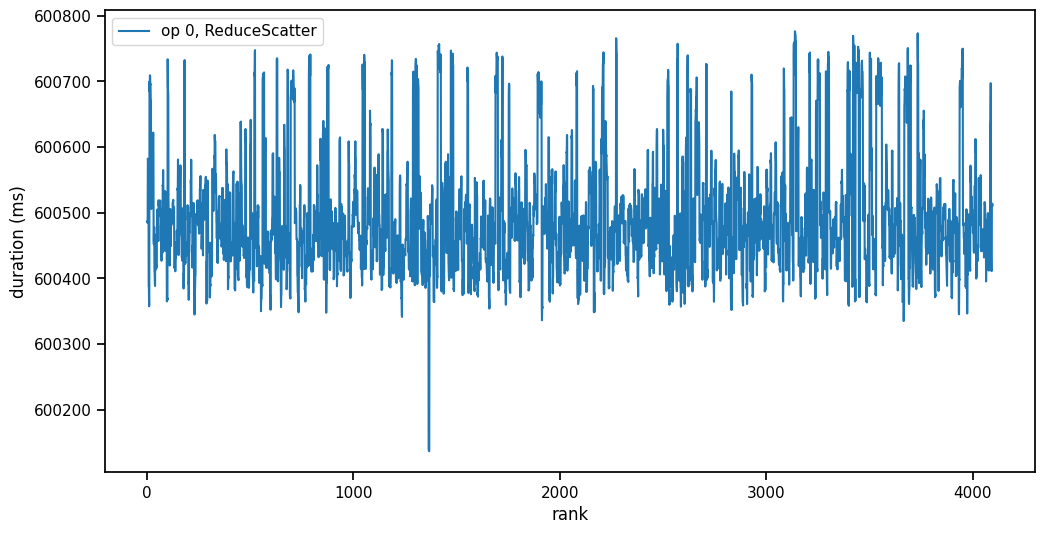

In [18]:
plot_op_times(timeout_comm)

In [19]:
other_half = global_comms['0x6b35aecc33f079ef']

In [20]:
other_half.get_completed_durations().min() // 1000.0

np.float64(0.0)

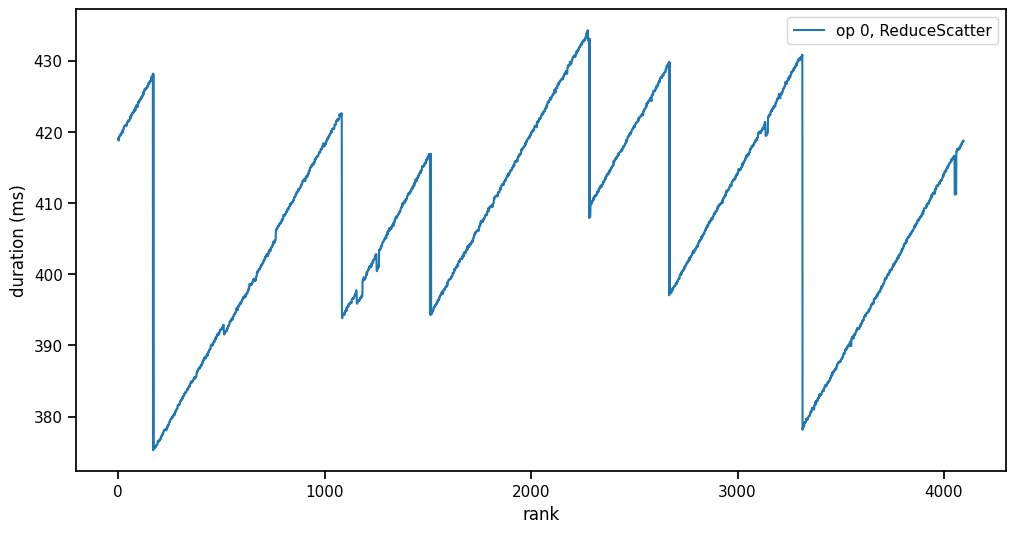

In [21]:
plot_op_times(other_half)

In [22]:
ag1 = global_comms['0xbc8a3ad231751b7']

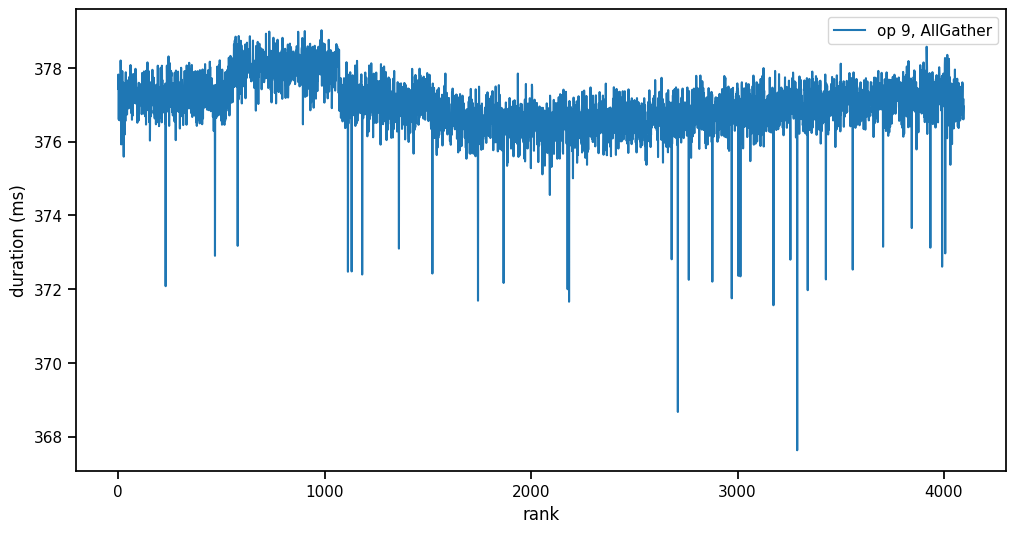

In [23]:
plot_op_times(ag1,opstart=9, opend=10)

In [24]:
global_comms_1 = pickle.load(open("test_1_output.pickle", "rb"))

In [25]:
global_comms_6 = pickle.load(open("test_6.pickle", "rb"))
comms_by_len = {}
for comm_id, comm in global_comms_6.items():
    if comm.size not in comms_by_len:
        comms_by_len[comm.size] = []
    comms_by_len[comm.size].append(comm_id)

for comm in comms_by_len[4096]:
    print(comm)
    print(f"Consistent: {global_comms_6[comm].check_consistency()}")
    print(f"{global_comms_6[comm].get_completed_opcounts()[0]} Completed Operations:")
    durations = global_comms_6[comm].get_completed_durations()
    #print(global_comms[comm].get_completed_operations())
    for iop, op in enumerate(global_comms_6[comm].get_completed_operations()):
        print(f"Operation {iop}: {op.op_type} count: {op.count} dtype: {op.dtype} Times: max {durations[:, iop].max()} ms min {durations[:, iop].min()} ms mean {durations[:, iop].mean()} ms")
    print("pending opcounts:")
    print(global_comms_6[comm].get_pending_opcounts())

0x8deea5929af6de22
Consistent: True
200 Completed Operations:
Operation 0: AllGather count: 131072 dtype: 9 Times: max 474.0089999977499 ms min 245.33000000519678 ms mean 372.3658562009362 ms
Operation 1: AllGather count: 131072 dtype: 9 Times: max 1249.98099997174 ms min 342.46499999426305 ms mean 880.8399401847921 ms
Operation 2: AllGather count: 131072 dtype: 9 Times: max 768.9610000234097 ms min 292.9860000149347 ms mean 566.7085808110102 ms
Operation 3: AllGather count: 131072 dtype: 9 Times: max 464.1680000349879 ms min 369.7040000115521 ms mean 382.9685437014092 ms
Operation 4: AllGather count: 131072 dtype: 9 Times: max 429.1959999827668 ms min 365.79599999822676 ms mean 398.48637866158043 ms
Operation 5: AllGather count: 131072 dtype: 9 Times: max 379.37500001862645 ms min 326.15900004748255 ms mean 377.17512890609584 ms
Operation 6: AllGather count: 131072 dtype: 9 Times: max 443.0339999962598 ms min 304.8230000422336 ms mean 408.8223791503012 ms
Operation 7: AllGather count:

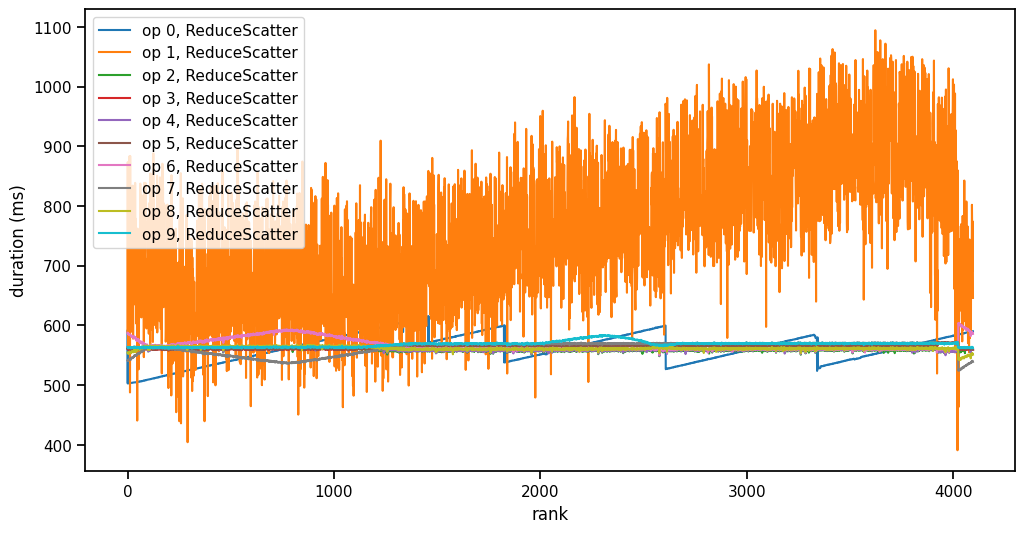

In [26]:
reduce_comm = global_comms_6['0x4ed83dba7f3d55a1']
plot_op_times(reduce_comm, opstart=0, opend=10)

In [27]:
len(comms_by_len[4096])

4

In [ ]:
global_comms_working = pickle.load(open("working_1.pickle", "rb"))
comms_by_len = {}
for comm_id, comm in global_comms_working.items():
    if comm.size not in comms_by_len:
        comms_by_len[comm.size] = []
    comms_by_len[comm.size].append(comm_id)

for comm in comms_by_len[4096]:
    print(comm)
    print(f"Consistent: {global_comms_working[comm].check_consistency()}")
    print(f"{global_comms_working[comm].get_completed_opcounts()[0]} Completed Operations:")
    durations = global_comms_working[comm].get_completed_durations()
    #print(global_comms[comm].get_completed_operations())
    for iop, op in enumerate(global_comms_working[comm].get_completed_operations()):
        print(f"Operation {iop}: {op.op_type} count: {op.count} dtype: {op.dtype} Times: max {durations[:, iop].max()} ms min {durations[:, iop].min()} ms mean {durations[:, iop].mean()} ms")
    print("pending opcounts:")
    print(global_comms_working[comm].get_pending_opcounts())